# load_digits : 손글씨 분류

## 필요한 모듈 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

## 데이터 준비

### load_digits

In [2]:
digits = load_digits()

print(type(digits))

<class 'sklearn.utils._bunch.Bunch'>


### load_digits 속성 출력

In [3]:
for attr in dir(digits):
    if not attr.startswith('_'): print(attr)

DESCR
data
feature_names
frame
images
target
target_names


## 데이터 이해하기

### 데이터셋 설명

In [4]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

**DESCR**  
digits: 손으로 쓴 숫자의 광학 인식을 위한 것  

**Data Set Characteristics:**
- :Number of Instances: 1797
    - 손으로 쓴 숫자 이미지
- :Number of Attributes: 64
    - 64개의 속성으로 구성
- :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    - 각 이미지는 8x8 픽셀로 이루어져 있으며,픽셀은 0부터 16까지의 정수 값을 가진다.
- :Missing Attribute Values: None
- :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
- :Date: July; 1998

이 데이터셋에는 교육 및 테스트를 위해 NIST(National Institute of Standards and Technology)에서 제공한 전처리 프로그램이 사용되었다. 이 데이터셋은 10개의 클래스로 구성되어 있으며, 각 클래스는 한 자릿수를 나타낸다.  

이 데이터셋은 기계 학습 연구 및 실험에서 많이 사용되는 데이터셋 중 하나이며, 자동화된 문자 인식 알고리즘의 성능을 평가하는 데 자주 활용된다.

### Feature Data 지정

- data 확인

In [5]:
data = digits.data
data.shape

(1797, 64)

- 샘플 데이터

In [6]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

- 샘플 데이터 시각화

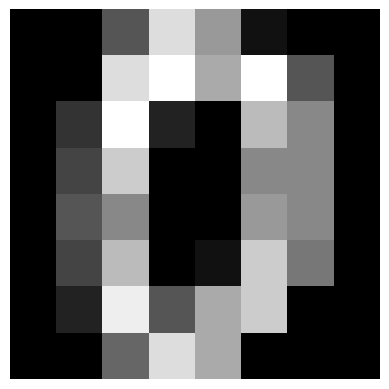

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline 
# 브라우저에서 바로 그림을 볼 수 있게 해주는 역할을 합니다 

plt.imshow(data[0].reshape(8, 8), cmap='gray')
plt.axis('off')
plt.show()

- 0 ~ 9까지 시각화

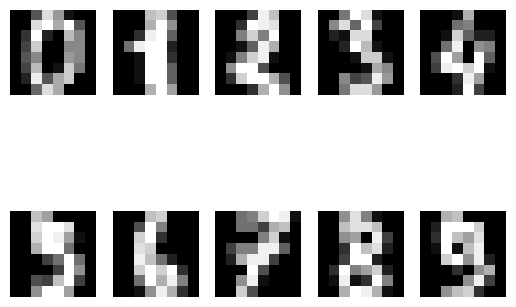

In [8]:
for i in range(10):
    plt.subplot(2, 5, i+1) # 10개의 이미지를 2행 5열로 표시
    plt.imshow(data[i].reshape(8, 8), cmap='gray') 
    plt.axis('off')
plt.show()

- feature names 출력

In [9]:
digits.feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

### Target Data 지정

- target 확인

In [10]:
target = digits.target
target.shape

(1797,)

In [11]:
target[:20]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

- target names 출력

In [12]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Describe

- pandas

In [13]:
df = pd.DataFrame(data)

# describe() 함수를 사용하여 기술 통계량 확인
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


- numpy

In [14]:
mean = np.mean(data)
std = np.std(data)
minimum = np.min(data)
maximum = np.max(data)

print(f'평균 : {mean:.4f}')
print(f'표준편차 : {std:.4f}')
print(f'최소값 : {minimum}')
print(f'최대값 : {maximum}')

평균 : 4.8842
표준편차 : 6.0168
최소값 : 0.0
최대값 : 16.0


## train, test 데이터 분리

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data,
                                                    target,
                                                    test_size=0.2,
                                                    random_state=42)

In [16]:
print(f'X train shape : {X_train.shape}')
print(f'y train shape : {y_train.shape}')
print(f'X test shape : {X_test.shape}')
print(f'y test shape : {y_test.shape}')

X train shape : (1437, 64)
y train shape : (1437,)
X test shape : (360, 64)
y test shape : (360,)


## 다양한 모델로 학습 및 평가

### Decision Tree

#### 모델 생성

In [17]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

#### 모델 속성 출력

In [18]:
for attr in dir(clf):
    if not attr.startswith('_'): print(attr)

apply
ccp_alpha
class_weight
cost_complexity_pruning_path
criterion
decision_path
feature_importances_
fit
get_depth
get_metadata_routing
get_n_leaves
get_params
max_depth
max_features
max_leaf_nodes
min_impurity_decrease
min_samples_leaf
min_samples_split
min_weight_fraction_leaf
predict
predict_log_proba
predict_proba
random_state
score
set_fit_request
set_params
set_predict_proba_request
set_predict_request
set_score_request
splitter


#### 모델 학습

In [20]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [21]:
y_pred = clf.predict(X_test)

In [22]:
print(f'depth = {clf.get_depth()}')
print(f'leaves = {clf.get_n_leaves()}')

depth = 15
leaves = 145


#### 모델 평가

In [23]:
accuracy = clf.score(X_test, y_test) # R-squared 값을 반환하는 메서드
print(f'{accuracy = }')

accuracy = 0.8472222222222222


In [24]:
accuracy_sklearn = accuracy_score(y_test, y_pred)
print(f'{accuracy_sklearn = }')

accuracy_sklearn = 0.8472222222222222


In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92        33
           1       0.88      0.79      0.83        28
           2       0.89      0.76      0.82        33
           3       0.79      0.88      0.83        34
           4       0.77      0.89      0.83        46
           5       0.93      0.85      0.89        47
           6       0.89      0.97      0.93        35
           7       0.79      0.88      0.83        34
           8       0.88      0.70      0.78        30
           9       0.77      0.82      0.80        40

    accuracy                           0.85       360
   macro avg       0.86      0.84      0.85       360
weighted avg       0.85      0.85      0.85       360



#### 결과 분석

결정 트리 모델 평가 결과
- **트리의 깊이(depth)**: 15
- **잎의 개수(leaves)**: 145
- **정확도(accuracy)**: 약 84.7%

결과 분석:
- 모델의 깊이가 15로 꽤 깊게 성장했으며, 이는 과적합의 가능성을 내포할 수 있다.
- 잎의 개수가 145개로 모델이 상당히 세분화되었다.
- 테스트 데이터에 대한 정확도는 약 84.7%로, 모델이 대부분의 샘플을 정확하게 분류한다는 것을 나타낸다.

모델 총평:  
정확도가 약 84.7%로 상당히 높지만, 깊이가 15인 결정 트리는 과적합의 가능성이 있다.  
모델의 일반화 성능을 높이기 위해 트리의 깊이를 줄이거나, 트리 가지치기(pruning) 등의 기법을 적용하여 모델을 개선할 수 있다.


### Random Forest

#### 모델 생성

In [27]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

#### 모델 속성 출력

In [28]:
for attr in dir(rfc):
    if not attr.startswith('_'): print(attr)

apply
base_estimator
base_estimator_
bootstrap
ccp_alpha
class_weight
criterion
decision_path
estimator
estimator_params
feature_importances_
fit
get_metadata_routing
get_params
max_depth
max_features
max_leaf_nodes
max_samples
min_impurity_decrease
min_samples_leaf
min_samples_split
min_weight_fraction_leaf
n_estimators
n_jobs
oob_score
predict
predict_log_proba
predict_proba
random_state
score
set_fit_request
set_params
set_score_request
verbose
warm_start


#### 모델 학습

In [29]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
y_pred = rfc.predict(X_test)

In [31]:
print(f'n_estimators = {rfc.n_estimators}')

n_estimators = 100


#### 모델 평가

In [32]:
accuracy = rfc.score(X_test, y_test)
print(f'{accuracy = }')

accuracy = 0.9722222222222222


In [33]:
accuracy_sklearn = accuracy_score(y_test, y_pred)
print(f'{accuracy_sklearn = }')

accuracy_sklearn = 0.9722222222222222


In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        33
           1       0.93      1.00      0.97        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       0.98      1.00      0.99        46
           5       0.96      0.96      0.96        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       1.00      0.93      0.97        30
           9       0.95      0.95      0.95        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



#### 결과 분석

랜덤 포레스트 모델 평가 결과

- **트리의 개수(n_estimators)**: 100
- **정확도(accuracy)**: 약 97.2%

결과 분석:
- 랜덤 포레스트 모델은 100개의 의사 결정 트리를 앙상블하여 구성되었다.
- 모델은 테스트 데이터에 대해 약 97.2%의 정확도를 보여주었다.
- sklearn의 `accuracy_score` 함수로 계산된 정확도 역시 97.5%로 확인되었다.
- 이러한 결과는 모델이 테스트 데이터에 대해 효과적으로 일반화되었음을 시사한다.

모델 총평:  
랜덤 포레스트 모델은 테스트 데이터에 대해 높은 정확도를 보여주고 있으며, 이는 모델이 테스트 데이터에 대해 잘 일반화되었음을 나타낸다.


### SVM

#### 모델 생성

In [35]:
from sklearn.svm import SVC

svm = SVC()

#### 모델 속성 출력

In [36]:
for attr in dir(svm):
    if not attr.startswith('_') : print(attr)

C
break_ties
cache_size
class_weight
coef0
coef_
decision_function
decision_function_shape
degree
epsilon
fit
gamma
get_metadata_routing
get_params
kernel
max_iter
n_support_
nu
predict
predict_log_proba
predict_proba
probA_
probB_
probability
random_state
score
set_fit_request
set_params
set_score_request
shrinking
tol
unused_param
verbose


#### 모델 학습

In [38]:
svm.fit(X_train, y_train)

SVC()

In [39]:
y_pred = svm.predict(X_test)

In [40]:
print(f'n_support_ = {svm.n_support_}')
print(f'kernel = {svm.kernel}')

n_support_ = [41 85 62 69 57 61 44 60 95 76]
kernel = rbf


#### 모델 평가

In [41]:
accuracy = svm.score(X_test, y_test)
print(f'{accuracy = }')

accuracy = 0.9861111111111112


In [42]:
accuracy_sklearn = accuracy_score(y_test, y_pred)
print(f'{accuracy_sklearn = }')

accuracy_sklearn = 0.9861111111111112


In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.95      0.95      0.95        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



#### 결과 분석

SVM 모델 평가 결과

- **서포트 벡터의 수(n_support_)**:
    - 클래스 0: 41개
    - 클래스 1: 85개
    - 클래스 2: 62개
    - 클래스 3: 69개
    - 클래스 4: 57개
    - 클래스 5: 61개
    - 클래스 6: 44개
    - 클래스 7: 60개
    - 클래스 8: 95개
    - 클래스 9: 76개
- **커널(kernel)**: 'rbf' (방사 기저 함수)
- **정확도(accuracy)**: 약 98.6%

결과 분석:
- SVM 모델은 테스트 데이터에 대해 약 98.6%의 정확도를 달성했다.
- 각 클래스에 대해 다양한 수의 서포트 벡터가 사용되었다.
- 'rbf' 커널이 사용되었으며, 이는 비선형 결정 경계를 생성하는 데 사용된다.
- sklearn의 `accuracy_score` 함수로 계산된 정확도 역시 98.6%로 확인되었다.

모델 총평:  
SVM 모델이 테스트 데이터에 매우 잘 적합되었음을 시사하며, 높은 정확도를 달성했음을 나타낸다.


### SGD Classifier

#### 모델 생성

In [44]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()

#### 모델 속성 출력

In [45]:
for attr in dir(sgd):
    if not attr.startswith('_'): print(attr)

C
alpha
average
class_weight
decision_function
densify
early_stopping
epsilon
eta0
fit
fit_intercept
get_metadata_routing
get_params
l1_ratio
learning_rate
loss
loss_functions
max_iter
n_iter_no_change
n_jobs
partial_fit
penalty
power_t
predict
predict_log_proba
predict_proba
random_state
score
set_fit_request
set_params
set_partial_fit_request
set_score_request
shuffle
sparsify
tol
validation_fraction
verbose
warm_start


#### 모델 학습

In [46]:
sgd.fit(X_train, y_train)

SGDClassifier()

In [47]:
y_pred = sgd.predict(X_test)

In [48]:
print(f'intercept: {sgd.intercept_}')
print(f'loss: {sgd.loss}')
print(f'penalty: {sgd.penalty}')
print(f'alpha: {sgd.alpha}')

intercept: [ -18.84166383 -128.93505021  -20.5292335   -31.89691561   -4.66190311
  -42.6874274   -39.74587705  -14.36923352 -156.53642696  -61.74976046]
loss: hinge
penalty: l2
alpha: 0.0001


#### 모델 평가

In [49]:
accuracy = sgd.score(X_test, y_test)
print(f'{accuracy = }')

accuracy = 0.9416666666666667


In [50]:
accuracy_sklearn = accuracy_score(y_test, y_pred)
print(f'{accuracy_sklearn = }')

accuracy_sklearn = 0.9416666666666667


In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.96      0.86      0.91        28
           2       0.97      1.00      0.99        33
           3       0.92      0.97      0.94        34
           4       1.00      0.98      0.99        46
           5       0.94      0.96      0.95        47
           6       0.89      0.97      0.93        35
           7       1.00      0.97      0.99        34
           8       0.75      0.90      0.82        30
           9       1.00      0.80      0.89        40

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.95      0.94      0.94       360



#### 결과 분석

SGD Classifier 모델 평가 결과

- **절편(intercept_)**:
    - 클래스 0: -18.84166383
    - 클래스 1: -128.93505021
    - 클래스 2: -20.5292335
    - 클래스 3: -31.89691561
    - 클래스 4: -4.66190311
    - 클래스 5: -42.6874274 
    - 클래스 6: -39.74587705
    - 클래스 7: -14.36923352 
    - 클래스 8: -156.53642696
    - 클래스 9: -61.74976046
- **손실 함수(loss)**: 'hinge'
- **규제 유형(penalty)**: 'l2'
- **알파(alpha)**: 0.0001
- **정확도(accuracy)**: 약 94.2%

결과 분석:
- SGD Classifier 모델은 테스트 데이터에 대해 약 94.2%의 정확도를 보였다.
- 각 클래스에 대한 모델의 절편이 제공되었다.
- 'hinge' 손실 함수와 'l2' 규제가 사용되다.
- 모델의 규제 강도는 알파값 0.0001로 설정되었다.

모델 총평:  
SGD Classifier 모델이 테스트 데이터에 대해 잘 작동하고 있는 것을 보여준다.


### Logistic Regression

#### 모델 생성

In [52]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

#### 모델 속성 출력

In [53]:
for attr in dir(lr):
    if not attr.startswith('_'): print(attr)

C
class_weight
decision_function
densify
dual
fit
fit_intercept
get_metadata_routing
get_params
intercept_scaling
l1_ratio
max_iter
multi_class
n_jobs
penalty
predict
predict_log_proba
predict_proba
random_state
score
set_fit_request
set_params
set_score_request
solver
sparsify
tol
verbose
warm_start


#### 모델 학습

In [54]:
lr.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [55]:
y_pred = lr.predict(X_test)

In [56]:
print(f'intercept: {lr.intercept_}')
print(f'classes: {lr.classes_}')
print(f'n_iter: {lr.n_iter_}')

intercept: [ 0.00139095 -0.07340498  0.00130014  0.00903918  0.04714707 -0.01860624
 -0.00430326  0.00929129  0.05345063 -0.02530478]
classes: [0 1 2 3 4 5 6 7 8 9]
n_iter: [100]


#### 모델 평가

In [57]:
accuracy = lr.score(X_test, y_test)
print(f'{accuracy = }')

accuracy = 0.9694444444444444


In [58]:
accuracy_sklearn = accuracy_score(y_test, y_pred)
print(f'{accuracy_sklearn = }')

accuracy_sklearn = 0.9694444444444444


In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       0.97      1.00      0.99        33
           3       0.97      0.97      0.97        34
           4       1.00      0.96      0.98        46
           5       0.92      0.94      0.93        47
           6       0.94      0.97      0.96        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



#### 결과 분석

로지스틱 회귀 모델 평가 결과
- **절편(intercept)**:
    - 클래스 0: 0.00139095
    - 클래스 1: -0.07340498
    - 클래스 2: 0.00130014
    - 클래스 3: 0.00903918
    - 클래스 4: 0.04714707
    - 클래스 5: -0.01860624
    - 클래스 6: -0.00430326
    - 클래스 7: 0.00929129
    - 클래스 8: 0.05345063
    - 클래스 9: -0.02530478
- **클래스 레이블(classes)**: 0부터 9까지의 클래스 레이블
- **반복 횟수(n_iter)**: 100
- **정확도(accuracy)**: 약 96.9%

결과 분석:
- 로지스틱 회귀 모델은 테스트 데이터에 대해 약 96.9%의 정확도를 보였다.
- 각 클래스에 대한 모델의 절편이 제공되었다.
- 모델은 100번의 반복을 거쳐 수렴되었다.

모델 총평:   
로지스틱 회귀 모델이 테스트 데이터에 대해 좋은 성능을 보여주고 있으며, 다중 클래스 분류 작업에 대해서도 효과적으로 작동함을 보여준다.


## 모델 평가해 보기

**정확도(accuracy)**  
전체 예측 중 올바르게 분류된 예측의 비율을 나타내므로, 다중 클래스 분류 문제에서 일반적으로 사용되는 지표

**정확도를 선택한 이유**
- 해석이 용이
    - 정확도는 모델의 전반적인 성능을 쉽게 이해할 수 있는 지표이다.
    - 예측이 얼마나 정확하게 이루어졌는지를 파악할 수 있다.
- 적합한 평가 지표
    - 숫자 이미지 분류와 같은 다중 클래스 분류 문제에서는 정확도가 적합한 평가 지표이다. 
    - 각 클래스에 대한 정확도를 확인하고자 한다면, 클래스별 정확도를 평가하여 더 자세한 정보를 얻을 수도 있다.
- 비교적 균형 잡힌 클래스
    - load_digits 데이터셋은 각 클래스(0부터 9까지의 숫자)에 대해 비교적 균형 잡혀 있으므로 정확도가 적절한 평가 지표이다. 
    - 클래스 간의 불균형이 크지 않을 때는 정확도가 신뢰할 수 있는 평가 지표로 사용될 수 있다.

## 회고

오늘은 scikit-learn에 있는 데이터를 모델링을 하였다.  
예전에 했던 걸 참고해서 이번 프로젝트에서는 데이터를 분석하는데 힘을 썼다.  

단순히 데이터만 보는 것이 아니라 내가 만든 모델의 주요 속성을 뽑아서 내가 학습한 모델의 속성값을 보고 분석을 하였다.  
이걸 알면 나중에 하이퍼파라미터 조정을 할 때 좋은 결과를 얻을 수 있지 않을까 기대해본다.  
이걸 잊어버리지 않도록 모든 프로젝트에 적용을 하였다.!!!  

뒤에 나오는 프로젝트 모두 비슷하게 했다.  
데이터가 달라서 분석 관점을 다르겠지만 크게 달라지지 않아서 비교적 쉽게 프로젝트를 수행했다.  

늘 프로젝트를 하면서 중요하다 생각하는 건 기초가 탄탄해야 응용도 잘 할 수 있단 것이다.  
이번에는 프로젝트 기초(?)이기 때문에 더 열심히 한 거 같다.!!   
물론 어렵다고 해서 덜 열심히하는 건 아니지만 다음엔 시각화도 해서 정밀하게 분석 해봐야겠다.